**Projek Klasifikasi Kingdom Suatu Makhluk Hidup Berdasarkan Kandungan Setiap Kodon yang ada di Rantai mRNA-nya**

- Jeremy Saputra Tatuil - 2540133000
- Roger Julianto Angryawan - 2501962990
- Lie Reubensto - 2540124633
- Joshua Evans Setiyawan -2501972354
- Gaizkia Adeline Atmaka - 2501972493

Dataset: https://www.kaggle.com/datasets/salikhussaini49/codon-usage


In [ ]:
# Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Extra Library For Uplaoding Files
from google.colab import files
import io

In [ ]:
# Obtain Dataset
file_name = "codon_usage.csv"
upload = files.upload()
df = pd.read_csv(io.BytesIO(upload[file_name]))
df

Saving codon_usage.csv to codon_usage.csv


,Kingdom,DNAtype,SpeciesID,Ncodons,SpeciesName,UUU,UUC,UUA,UUG,CUU,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,100217,1995,Epizootic haematopoietic necrosis virus,0.01654,0.01203,0.00050,0.00351,0.01203,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,100220,1474,Bohle iridovirus,0.02714,0.01357,0.00068,0.00678,0.00407,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,100755,4862,Sweet potato leaf curl virus,0.01974,0.02180,0.01357,0.01543,0.00782,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,100880,1915,Northern cereal mosaic virus,0.01775,0.02245,0.01619,0.00992,0.01567,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,100887,22831,Soil-borne cereal mosaic virus,0.02816,0.01371,0.00767,0.03679,0.01380,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13779,pri,0,9601,1097,Pongo pygmaeus abelii,0.02552,0.03555,0.00547,0.01367,0.01276,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13780,pri,1,9601,2067,mitochondrion Pongo pygmaeus abelii,0.01258,0.03193,0.01984,0.00629,0.01451,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13781,pri,1,9602,1686,mitochondrion Pongo pygmaeus pygmaeus,0.01423,0.03321,0.01661,0.00356,0.01127,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13782,pri,0,9606,40662582,Homo sapiens,0.01757,0.02028,0.00767,0.01293,0.01319,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [ ]:
# Dataset Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13784 entries, 0 to 13783
Data columns (total 69 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Kingdom      13784 non-null  object 
 1   DNAtype      13784 non-null  int64  
 2   SpeciesID    13784 non-null  int64  
 3   Ncodons      13784 non-null  int64  
 4   SpeciesName  13784 non-null  object 
 5   UUU          13784 non-null  float64
 6   UUC          13784 non-null  float64
 7   UUA          13784 non-null  float64
 8   UUG          13784 non-null  float64
 9   CUU          13784 non-null  float64
 10  CUC          13784 non-null  float64
 11  CUA          13784 non-null  float64
 12  CUG          13784 non-null  float64
 13  AUU          13784 non-null  float64
 14  AUC          13784 non-null  float64
 15  AUA          13784 non-null  float64
 16  AUG          13784 non-null  float64
 17  GUU          13784 non-null  float64
 18  GUC          13784 non-null  float64
 19  GUA 

In [ ]:
# Numerical Statistics of Dataset
df.describe()

,DNAtype,SpeciesID,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
count,13784.000000,13784.000000,1.378400e+04,13784.00000,13784.000000,13784.000000,13784.000000,13784.000000,13784.000000,13784.000000,...,13784.000000,13784.000000,13784.000000,13784.000000,13784.000000,13784.000000,13784.000000,13784.000000,13784.000000,13784.000000
mean,0.368180,129005.305281,8.729340e+04,0.02459,0.023693,0.020388,0.013760,0.017841,0.018644,0.019658,...,0.005545,0.009672,0.006375,0.023715,0.021235,0.028208,0.021655,0.001669,0.000586,0.006378
std,0.679211,124636.054570,9.311406e+05,0.01726,0.011587,0.020455,0.009218,0.010579,0.014559,0.024826,...,0.006617,0.008530,0.006376,0.013741,0.012876,0.014211,0.015068,0.001803,0.000869,0.010367
min,0.000000,7.000000,1.000000e+03,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,28313.500000,1.599000e+03,0.01402,0.015570,0.005428,0.006667,0.010860,0.008000,0.005250,...,0.001190,0.001520,0.001030,0.011740,0.012098,0.017440,0.009365,0.000570,0.000000,0.000440
50%,0.000000,80303.000000,2.909000e+03,0.02163,0.022220,0.015130,0.012950,0.016050,0.015050,0.009610,...,0.003580,0.008880,0.004495,0.024740,0.019170,0.026080,0.020575,0.001390,0.000420,0.001240
75%,1.000000,221537.250000,9.087500e+03,0.03092,0.029532,0.029385,0.019425,0.022830,0.025622,0.017750,...,0.007410,0.015640,0.010320,0.033702,0.027702,0.036710,0.031330,0.002400,0.000820,0.003302
max,12.000000,465364.000000,4.066258e+07,0.21730,0.091690,0.151330,0.101190,0.089780,0.100350,0.163920,...,0.055540,0.098830,0.058430,0.185660,0.113840,0.144890,0.158550,0.045200,0.025610,0.106700


In [ ]:
# Check Missing Value in Dataset
miss = df.columns[df.isnull().any()]

if miss.empty == False:
  for column in miss:
    print(column)
else:
  print("Tidak ada missing values")

Tidak ada missing values


In [ ]:
# Check The Distinct Values of The "Kingdom" Column
df['Kingdom'].unique()

array(['vrl', 'arc', 'bct', 'phg', 'plm', 'pln', 'inv', 'vrt', 'mam',
       'rod', 'pri'], dtype=object)

In [ ]:
# Check Distinct Rows in Dataset Based on The "SpeciesName" Column
distinct_sp = set(df['SpeciesName'])
print(len(distinct_sp))

13014


In [ ]:
# Checkpoint
df_new = df.copy()

# Drop Unnecessary Categoric Columns
df_new = df_new.drop(["SpeciesID", "SpeciesName"], axis=1)
df_new

,Kingdom,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,...,CGG,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA
0,vrl,0,1995,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,...,0.00451,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000
1,vrl,0,1474,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,...,0.00136,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000
2,vrl,0,4862,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,...,0.00596,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144
3,vrl,0,1915,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,...,0.00366,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000
4,vrl,0,22831,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,...,0.00604,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13779,pri,0,1097,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,...,0.00820,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638
13780,pri,1,2067,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,...,0.00145,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887
13781,pri,1,1686,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,...,0.00000,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017
13782,pri,0,40662582,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,...,0.01142,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156


In [ ]:
# New Dataset Information
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13784 entries, 0 to 13783
Data columns (total 67 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Kingdom  13784 non-null  object 
 1   DNAtype  13784 non-null  int64  
 2   Ncodons  13784 non-null  int64  
 3   UUU      13784 non-null  float64
 4   UUC      13784 non-null  float64
 5   UUA      13784 non-null  float64
 6   UUG      13784 non-null  float64
 7   CUU      13784 non-null  float64
 8   CUC      13784 non-null  float64
 9   CUA      13784 non-null  float64
 10  CUG      13784 non-null  float64
 11  AUU      13784 non-null  float64
 12  AUC      13784 non-null  float64
 13  AUA      13784 non-null  float64
 14  AUG      13784 non-null  float64
 15  GUU      13784 non-null  float64
 16  GUC      13784 non-null  float64
 17  GUA      13784 non-null  float64
 18  GUG      13784 non-null  float64
 19  GCU      13784 non-null  float64
 20  GCC      13784 non-null  float64
 21  GCA      137

In [ ]:
# Feature Engineering Label Encoding (Used Because It can Give Numeric "Labels" to The Categorical Target Variable, which is "Kingdom")
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_check = df_new[['Kingdom']].copy()

labels = df_new['Kingdom'].unique()
encoder.fit(labels)

# Encode the Labels
encoded_labels = encoder.transform(labels)

# Determine the Original Label for a Specific Encoded Value
print("Encoded Label - Original Label:")
for i in range(11):
  original_label = encoder.inverse_transform([i])[0]
  print(f"{i} - {original_label}")

Encoded Label - Original Label:
0 - arc
1 - bct
2 - inv
3 - mam
4 - phg
5 - plm
6 - pln
7 - pri
8 - rod
9 - vrl
10 - vrt


In [ ]:
# Checkpoint, Create New Column for Encoded Target Variable, and Delete The Old Target Variable
df_fix = df_new.copy()
df_fix['EncodedKingdom'] = encoder.fit_transform(df_fix['Kingdom'])
df_fix = df_fix.drop('Kingdom',axis=1)
df_fix

,DNAtype,Ncodons,UUU,UUC,UUA,UUG,CUU,CUC,CUA,CUG,...,AGA,AGG,GAU,GAC,GAA,GAG,UAA,UAG,UGA,EncodedKingdom
0,0,1995,0.01654,0.01203,0.00050,0.00351,0.01203,0.03208,0.00100,0.04010,...,0.01303,0.03559,0.01003,0.04612,0.01203,0.04361,0.00251,0.00050,0.00000,9
1,0,1474,0.02714,0.01357,0.00068,0.00678,0.00407,0.02849,0.00204,0.04410,...,0.01696,0.03596,0.01221,0.04545,0.01560,0.04410,0.00271,0.00068,0.00000,9
2,0,4862,0.01974,0.02180,0.01357,0.01543,0.00782,0.01111,0.01028,0.01193,...,0.01974,0.02489,0.03126,0.02036,0.02242,0.02468,0.00391,0.00000,0.00144,9
3,0,1915,0.01775,0.02245,0.01619,0.00992,0.01567,0.01358,0.00940,0.01723,...,0.01410,0.01671,0.03760,0.01932,0.03029,0.03446,0.00261,0.00157,0.00000,9
4,0,22831,0.02816,0.01371,0.00767,0.03679,0.01380,0.00548,0.00473,0.02076,...,0.01494,0.01734,0.04148,0.02483,0.03359,0.03679,0.00000,0.00044,0.00131,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13779,0,1097,0.02552,0.03555,0.00547,0.01367,0.01276,0.02097,0.00820,0.03555,...,0.01367,0.01094,0.01367,0.02279,0.02005,0.04102,0.00091,0.00091,0.00638,7
13780,1,2067,0.01258,0.03193,0.01984,0.00629,0.01451,0.05322,0.07644,0.01258,...,0.00000,0.00048,0.00194,0.01306,0.01838,0.00677,0.00242,0.00097,0.01887,7
13781,1,1686,0.01423,0.03321,0.01661,0.00356,0.01127,0.05042,0.09609,0.01068,...,0.00000,0.00000,0.00178,0.01661,0.02788,0.00297,0.00356,0.00119,0.02017,7
13782,0,40662582,0.01757,0.02028,0.00767,0.01293,0.01319,0.01959,0.00715,0.03964,...,0.01217,0.01196,0.02178,0.02510,0.02896,0.03959,0.00099,0.00079,0.00156,7


In [ ]:
# Check Missing Value in New Fix Dataset
miss_fix = df_fix.columns[df_fix.isnull().any()]

if miss_fix.empty == False:
  for column in miss_fix:
    print(column)
else:
  print("Tidak ada missing values")

Tidak ada missing values


In [ ]:
# Split Dataset into Training, Validation, and Testing Datasets
from sklearn.model_selection import train_test_split as tts

# Training = 60%, Validation = 20%, Testing = 20%
df_train, df_validation_testing = tts(df_fix,
                                      test_size=0.4,
                                      random_state=99)
df_validation, df_testing = tts(df_validation_testing,
                                test_size=0.5,
                                random_state=99)

print("Number of Rows:")
print("All Data:", len(df_fix))
print("Training Data:", len(df_train))
print("Validation Data:", len(df_validation))
print("Testing Data:", len(df_testing))

In [ ]:
# Predictor and Target Variables Separation
x_train = df_train.drop('EncodedKingdom',axis=1)
y_train = df_train['EncodedKingdom']

x_val = df_validation.drop('EncodedKingdom',axis=1)
y_val = df_validation['EncodedKingdom']

x_test = df_testing.drop('EncodedKingdom',axis=1)
y_test = df_testing['EncodedKingdom']

In [ ]:
# Train Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.metrics import classification_report as CR

rf = RFC(random_state = 99)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=99)

In [ ]:
# Check Random Forest Validation Metrics
y_pred_val = rf.predict(x_val)
report_val = CR(y_val, y_pred_val)
print(report_val)

              precision    recall  f1-score   support

           0       0.92      0.61      0.73        18
           1       0.91      0.97      0.94       587
           2       0.91      0.73      0.81       283
           3       0.92      0.69      0.79       120
           4       0.97      0.54      0.69        52
           5       1.00      0.91      0.95        32
           6       0.89      0.90      0.90       526
           7       0.88      0.99      0.93       156
           8       1.00      0.51      0.68        51
           9       0.85      0.95      0.90       542
          10       0.92      0.95      0.94       390

    accuracy                           0.90      2757
   macro avg       0.92      0.80      0.84      2757
weighted avg       0.90      0.90      0.89      2757



In [ ]:
# Check Random Forest Testing Metrics
y_pred_test = rf.predict(x_test)
report_test_rf = CR(y_test, y_pred_test)
print(report_test_rf)

              precision    recall  f1-score   support

           0       0.96      0.63      0.76        35
           1       0.91      0.97      0.94       585
           2       0.93      0.74      0.82       242
           3       0.97      0.79      0.87       112
           4       0.97      0.52      0.67        58
           5       1.00      0.97      0.98        33
           6       0.90      0.94      0.92       498
           7       0.90      0.98      0.94       133
           8       1.00      0.55      0.71        38
           9       0.88      0.95      0.91       577
          10       0.94      0.94      0.94       446

    accuracy                           0.91      2757
   macro avg       0.94      0.82      0.86      2757
weighted avg       0.91      0.91      0.91      2757



In [ ]:
# Train XGBoost Classifier Model
import xgboost as XGB

xgb = XGB.XGBClassifier(random_state = 99)
xgb.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [ ]:
# Check XGBoost Classifier Validation Metrics
y_pred_val = xgb.predict(x_val)
report_val = CR(y_val, y_pred_val)
print(report_val)

              precision    recall  f1-score   support

           0       0.82      0.78      0.80        18
           1       0.93      0.96      0.95       587
           2       0.91      0.83      0.87       283
           3       0.88      0.73      0.80       120
           4       0.84      0.60      0.70        52
           5       1.00      0.91      0.95        32
           6       0.90      0.93      0.92       526
           7       0.90      0.99      0.95       156
           8       0.83      0.57      0.67        51
           9       0.90      0.94      0.92       542
          10       0.94      0.95      0.95       390

    accuracy                           0.91      2757
   macro avg       0.90      0.84      0.86      2757
weighted avg       0.91      0.91      0.91      2757



In [ ]:
# Check XGBoost Classifier Testing Metrics
y_pred_test = xgb.predict(x_test)
report_test_xgb = CR(y_test, y_pred_test)
print(report_test_xgb)

              precision    recall  f1-score   support

           0       0.89      0.71      0.79        35
           1       0.94      0.97      0.96       585
           2       0.85      0.83      0.84       242
           3       0.91      0.85      0.88       112
           4       0.97      0.64      0.77        58
           5       1.00      0.97      0.98        33
           6       0.92      0.95      0.93       498
           7       0.94      0.98      0.96       133
           8       0.90      0.71      0.79        38
           9       0.95      0.96      0.95       577
          10       0.94      0.95      0.95       446

    accuracy                           0.93      2757
   macro avg       0.93      0.86      0.89      2757
weighted avg       0.93      0.93      0.93      2757



In [ ]:
# Train Sampling (Bagging Classifier With Random Forest Classifier Estimator) Classifier Model
from sklearn.ensemble import BaggingClassifier as BAG

bag = BAG(estimator = RFC(random_state = 99))
bag.fit(x_train, y_train)

BaggingClassifier(estimator=RandomForestClassifier(random_state=99))

In [ ]:
# Check Sampling Validation Metrics
y_pred_val = bag.predict(x_val)
report_val = CR(y_val, y_pred_val)
print(report_val)

              precision    recall  f1-score   support

           0       1.00      0.61      0.76        18
           1       0.90      0.97      0.93       587
           2       0.96      0.70      0.81       283
           3       0.89      0.68      0.77       120
           4       0.93      0.48      0.63        52
           5       1.00      0.91      0.95        32
           6       0.89      0.92      0.90       526
           7       0.86      0.99      0.92       156
           8       0.96      0.43      0.59        51
           9       0.84      0.95      0.89       542
          10       0.91      0.95      0.93       390

    accuracy                           0.89      2757
   macro avg       0.92      0.78      0.83      2757
weighted avg       0.89      0.89      0.88      2757



In [ ]:
# Check Sampling Testing Metrics
y_pred_test = bag.predict(x_test)
report_test_bag = CR(y_test, y_pred_test)
print(report_test_bag)

              precision    recall  f1-score   support

           0       0.95      0.60      0.74        35
           1       0.89      0.97      0.93       585
           2       0.94      0.71      0.81       242
           3       0.94      0.78      0.85       112
           4       0.97      0.48      0.64        58
           5       1.00      0.97      0.98        33
           6       0.90      0.94      0.92       498
           7       0.88      0.95      0.91       133
           8       1.00      0.45      0.62        38
           9       0.88      0.95      0.91       577
          10       0.93      0.94      0.93       446

    accuracy                           0.90      2757
   macro avg       0.93      0.79      0.84      2757
weighted avg       0.91      0.90      0.90      2757



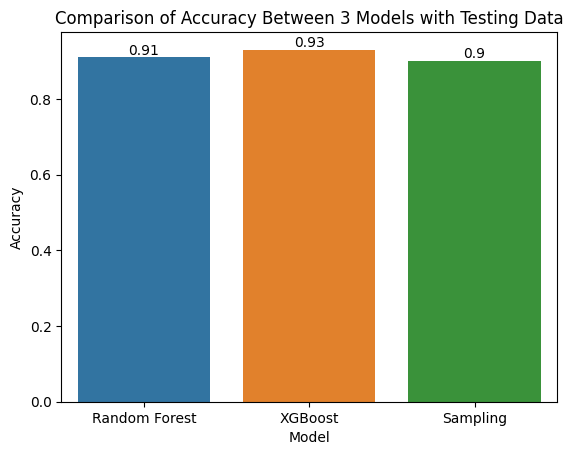

In [ ]:
# Graph to Compare The Accuracy Between 3 Models with Testing Data
accuracy = [float(report.split()[60]) for report in [report_test_rf, report_test_xgb, report_test_bag]]
sns.barplot(x = ["Random Forest", "XGBoost", "Sampling"], y = accuracy)
for i, accu in enumerate(accuracy):
    plt.text(i, accu, str(accuracy[i]), ha = "center", va = "bottom")
plt.title("Comparison of Accuracy Between 3 Models with Testing Data")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Hyperparameter Tunning with Grid Search
from sklearn.model_selection import GridSearchCV

rfc_grid = {
    'n_estimators': [300, 500],
    'max_depth': [20, 50],
    'min_samples_split': [3, 7],
    'min_samples_leaf': [3, 7],
}

xgb_grid = {
    'learning_rate': [0.01, 0.001],
    'max_depth': [10, 20],
    'n_estimators': [300, 500],
    'subsample': [0.75, 0.9],
    'colsample_bytree': [0.75, 0.9]
}

bag_grid = {
    'estimator__max_depth': [5, 8],
    'max_samples': [0.6, 0.75],
    'bootstrap': [True, False]
}

In [ ]:
# Train Hyperparameter-Tunned Random Forest Classifier Model
rfc_grid_search = GridSearchCV(rf, rfc_grid, cv = 5)
rfc_grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=99),
             param_grid={'max_depth': [10, 20], 'max_features': ['sqrt'],
                         'min_samples_leaf': [3, 5],
                         'min_samples_split': [3, 5],
                         'n_estimators': [200, 300]})

In [ ]:
# Get Best Paramaters & Model
best_params = rfc_grid_search.best_params_
best_model = rfc_grid_search.best_estimator_
print(best_params)

{'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 3, 'n_estimators': 300}


In [ ]:
# Metrics of HT Random Forest Classifier with Validation Dataset
y_pred_val = best_model.predict(x_val)
report_val = CR(y_val, y_pred_val)
print(report_val)

              precision    recall  f1-score   support

           0       1.00      0.50      0.67        18
           1       0.90      0.96      0.93       587
           2       0.95      0.71      0.82       283
           3       0.90      0.68      0.77       120
           4       0.89      0.46      0.61        52
           5       1.00      0.81      0.90        32
           6       0.90      0.91      0.90       526
           7       0.87      0.99      0.92       156
           8       0.91      0.41      0.57        51
           9       0.83      0.95      0.89       542
          10       0.91      0.95      0.93       390

    accuracy                           0.89      2757
   macro avg       0.91      0.76      0.81      2757
weighted avg       0.89      0.89      0.88      2757



In [ ]:
# Metrics of HT Random Forest Classifier with Testing Dataset
y_pred_test = best_model.predict(x_test)
report_test_rf_grid = CR(y_test, y_pred_test)
print(report_test_rf_grid)

              precision    recall  f1-score   support

           0       0.95      0.51      0.67        35
           1       0.88      0.97      0.92       585
           2       0.92      0.71      0.80       242
           3       0.93      0.77      0.84       112
           4       0.97      0.48      0.64        58
           5       1.00      0.91      0.95        33
           6       0.90      0.93      0.92       498
           7       0.90      0.92      0.91       133
           8       1.00      0.47      0.64        38
           9       0.86      0.95      0.91       577
          10       0.93      0.94      0.93       446

    accuracy                           0.90      2757
   macro avg       0.93      0.78      0.83      2757
weighted avg       0.90      0.90      0.89      2757



In [ ]:
# Train Hyperparameter-Tunned XGBoost Classifier Model
xgb_grid_search = GridSearchCV(xgb, xgb_grid, cv = 5)
xgb_grid_search.fit(x_train, y_train)

In [ ]:
# Get Best Paramaters & Model
best_params = xgb_grid_search.best_params_
best_model = xgb_grid_search.best_estimator_
print(best_params)

In [ ]:
# Metrics of HT XGBoost Classifier with Validation Dataset
y_pred_val = best_model.predict(x_val)
report_val = CR(y_val, y_pred_val)
print(report_val)

In [ ]:
# Metrics of HT XGBoost Classifier with Testing Dataset
y_pred_test = best_model.predict(x_test)
report_test_xgb_grid = CR(y_test, y_pred_test)
print(report_test_xgb_grid)

In [ ]:
# Train Hyperparameter-Tunned Bagging Classifier Model
bag_grid_search = GridSearchCV(bag, bag_grid, cv = 5)
bag_grid_search.fit(x_train, y_train)

In [ ]:
# Get Best Paramaters & Model
best_params = bag_grid_search.best_params_
best_model = bag_grid_search.best_estimator_
print(best_params)

In [ ]:
# Metrics of HT Bagging Classifier with Validation Dataset
y_pred_val = best_model.predict(x_val)
report_val = CR(y_val, y_pred_val)
print(report_val)

In [ ]:
# Metrics of HT Bagging Classifier with Testing Dataset
y_pred_test = best_model.predict(x_test)
report_test_bag_grid = CR(y_test, y_pred_test)
print(report_test_bag_grid)

In [ ]:
# Graph to Compare The Accuracy Between 3 Models with Testing Data After Tunning
accuracy = [float(report.split()[60]) for report in [report_test_rf_grid, report_test_xgb_grid, report_test_bag_grid]]
sns.barplot(x = ["Random Forest", "XGBoost", "Sampling"], y = accuracy)
for i, accu in enumerate(accuracy):
    plt.text(i, accu, str(accuracy[i]), ha = "center", va = "bottom")
plt.title("Comparison of Accuracy Between 3 Models with Testing Data After Tunning")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
# Graph The Time Needed to Train Each Model
labels = ["Random Forest", "XGBoost", "Sampling"]
time1 = [7.7, 7.5, 50.5]
time2 = [(43 * 60) + 15, (131 * 60) + 0.9, (27 * 60) + 29.5]

fig, ax = plt.subplots()

width = 0.25
ax.bar(labels, time1, width, label = 'Before Tuning')
ax.bar([i + width for i in range(len(labels))], time2, width, label = 'After Tuning')

for i, (t1, t2) in enumerate(zip(time1, time2)):
    ax.text(i - width/2, t1, str(time1[i]), va='bottom')
    ax.text(i + width/2, t2, str(time2[i]), va='bottom')

ax.set_xticks([i + width/2 for i in range(len(labels))])
ax.set_xticklabels(labels)

ax.set_ylabel("Time Needed to Train (in seconds)")
ax.set_xlabel("Model")
ax.set_title("Comparison of Time Needed to Train The Models (in seconds)")
ax.legend()

plt.grid()
plt.show()